In [23]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')


In [3]:
env = gym.make('Blackjack-v0')

In [4]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score>= 20 else 1

In [11]:
def generate_episode(policy, env):
    states, actions, rewards = [], [], []
    observation = env.reset()
    while True:
        
        states.append(observation)
        action = sample_policy(observation)
        actions.append(action)
        observation , reward, done, info =env.step(action)
        rewards.append(reward)
        if done:
            break
    return states, actions, rewards
    

In [14]:
def first_visit_mc_prediction( policy, env, n_episodes):
    value_table = defaultdict(float)
    N = defaultdict(int)
    
    for _ in range(n_episodes):
        states, _, rewards = generate_episode(policy, env)
        returns =0
        for t in range(len(states) -1,-1,-1):
            R = rewards[t]
            S = states[t]
            returns +=R
            #check for first visit monte carlo
            if S not in states[:t]:
                N[S]+=1
                value_table[S] += (returns-value_table[S])/N[S]
    return value_table

In [33]:
value = first_visit_mc_prediction(sample_policy, env, n_episodes = 10000)

In [45]:
#print(value.items())

Text(0.5, 0.92, 'value function without usable ace')

Text(0.5, 0.92, 'value function with usable ace')

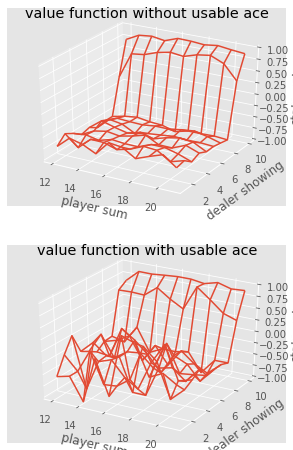

In [47]:
def plot_blackjack(V, ax1, ax2):
    player_sum = np.arange(12, 21+1)
    dealer_show = np.arange(1,10+1)
    usable_ace = np.array([False, True])
    
    state_values = np.zeros((len(player_sum), len(dealer_show), len(usable_ace)))
    
    for i , player in enumerate(player_sum):
        for j , dealer in enumerate(dealer_show):
            for k , ace in enumerate(usable_ace):
                state_values[i,j,k] = V[player ,dealer ,ace]
    
    X,Y = np.meshgrid(player_sum, dealer_show)
    ax1.plot_wireframe(X,Y,state_values[:,:,0])
    ax2.plot_wireframe(X,Y, state_values[:,:,1])
    
    for ax in ax1, ax2:
        ax.set_zlim(-1,1)
        ax.set_xlabel('player sum')
        ax.set_ylabel('dealer showing')
        ax.set_zlabel('state-value')
        
fig, axes = plt.subplots(nrows=2, figsize =(5,8), subplot_kw = {'projection': '3d'})
axes[0].set_title('value function without usable ace')
axes[1].set_title('value function with usable ace')

plot_blackjack(value, axes[0], axes[1])

In [11]:
import gym
from IPython import display
import numpy as np
import pandas as pd
from collections import namedtuple
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
%matplotlib inline
import time

env = gym.make('Blackjack-v0') # insert your favorite environment
env.reset()
env.render()
#img = plt.imshow(env.render())


for _ in range(10):
    #img.set_data(env.render())
    display.display(env.render())
    time.sleep(0.25)
    display.clear_output(wait = True)
    
    action = env.action_space.sample()
    env.step(action)

NotImplementedError: 